# Intro to CNN and Computer Vision with TF


### CV is the practice of writing algorithm which can discover patterns in Visual data. Such as the camera of self-driving car recognizing the car in front

In [35]:
# import tensorflow


import tensorflow as tf
#import tensorflow_probability as tfp
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(tf.__version__)

2.3.0


## Get the Data



#### the images we are working with are from the food 101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101/version/1?select=food-101.zip

#### however we are modified it to only 2 classes (pizza and steak) : https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

In [8]:
import zipfile

#!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
    

    
# unzip the downloaded file

zip_ref = zipfile.ZipFile(r"D:\Data Science Course details\pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

### inspect the data (become one with it)



#### a very crucial step at the begining of any ML project is becoming one with the data. 

#### and for a CV project.. this usually means visualzing many samples of data. 



In [14]:
# view the list of images in the train dataset taken from train folder

import os
entries = os.listdir(r'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\train\steak')
entries

['1000205.jpg',
 '100135.jpg',
 '101312.jpg',
 '1021458.jpg',
 '1032846.jpg',
 '10380.jpg',
 '1049459.jpg',
 '1053665.jpg',
 '1068516.jpg',
 '1068975.jpg',
 '1081258.jpg',
 '1090122.jpg',
 '1093966.jpg',
 '1098844.jpg',
 '1100074.jpg',
 '1105280.jpg',
 '1117936.jpg',
 '1126126.jpg',
 '114601.jpg',
 '1147047.jpg',
 '1147883.jpg',
 '1155665.jpg',
 '1163977.jpg',
 '1190233.jpg',
 '1208405.jpg',
 '1209120.jpg',
 '1212161.jpg',
 '1213988.jpg',
 '1219039.jpg',
 '1225762.jpg',
 '1230968.jpg',
 '1236155.jpg',
 '1241193.jpg',
 '1248337.jpg',
 '1257104.jpg',
 '126345.jpg',
 '1264050.jpg',
 '1264154.jpg',
 '1264858.jpg',
 '127029.jpg',
 '1289900.jpg',
 '1290362.jpg',
 '1295457.jpg',
 '1312841.jpg',
 '1313316.jpg',
 '1324791.jpg',
 '1327567.jpg',
 '1327667.jpg',
 '1333055.jpg',
 '1334054.jpg',
 '1335556.jpg',
 '1337814.jpg',
 '1340977.jpg',
 '1343209.jpg',
 '134369.jpg',
 '1344105.jpg',
 '134598.jpg',
 '1346387.jpg',
 '1348047.jpg',
 '1351372.jpg',
 '1362989.jpg',
 '1367035.jpg',
 '1371177.jpg',
 

In [15]:
# walk through pizza_steak directory and list no of files

for dirpath, dirnames, filenames in os.walk(r'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak'.
There are 2 directories and 1 images in 'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\test'.
There are 0 directories and 250 images in 'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\test\steak'.
There are 2 directories and 1 images in 'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\train'.
There are 0 directories and 750 images in 'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\train\steak'.


In [16]:
# another way to find out how many images are in a file


num_steak_images_train= len(os.listdir(r'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\train\steak'))
num_steak_images_train

750

### to visualize our images, first get the class names programmatically



In [18]:
# get the class names programmatically

import pathlib
import numpy as np
data_dir = pathlib.Path(r'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\train')
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))   # created a list of class_names from the subdirectories
class_names = class_names[1:]   # remove .DS store
print(class_names)

['pizza' 'steak']


In [19]:
# lets visualize our images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    #set up the target directory (we will view the image)
    target_folder = target_dir + target_class
    
    # get random image path
    random_image = random.sample(os.listdir(target_folder), 1 )
    
    
    # read the image and plot it using matplotlib
    img = mpimg.imread(target_folder+ "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off');
    
    print(f"Image shape:{img.shape}")   # show the shape of image
    
    return img

Image shape:(384, 512, 3)


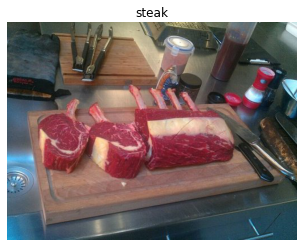

In [20]:
# view random image from the training dataset

img = view_random_image(target_dir=r'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\train/',
                       target_class='steak')

Image shape:(512, 512, 3)


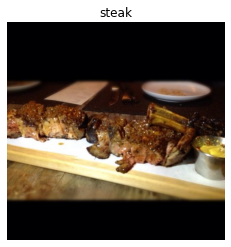

In [21]:
# view random image from the training dataset

img = view_random_image(target_dir=r'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\train/',
                       target_class='steak')

Image shape:(382, 512, 3)


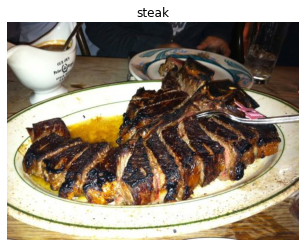

In [22]:
# view random image from the training dataset

img = view_random_image(target_dir=r'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\train/',
                       target_class='steak')

Image shape:(512, 512, 3)


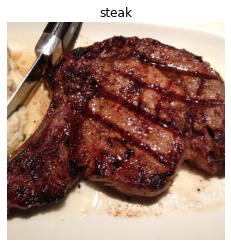

In [23]:
# view random image from the training dataset

img = view_random_image(target_dir=r'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\train/',
                       target_class='steak')

Image shape:(512, 512, 3)


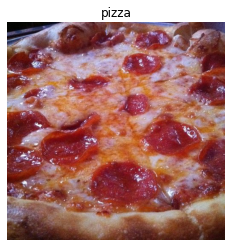

In [24]:
# view random image from the training dataset

img = view_random_image(target_dir=r'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\train/',
                       target_class='pizza')

Image shape:(512, 289, 3)


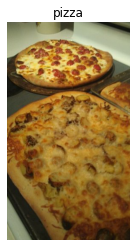

In [25]:
# view random image from the training dataset

img = view_random_image(target_dir=r'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\train/',
                       target_class='pizza')

Image shape:(512, 512, 3)


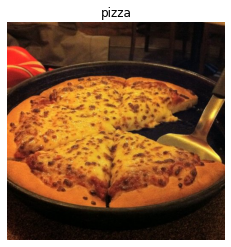

In [26]:
# view random image from the training dataset

img = view_random_image(target_dir=r'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\train/',
                       target_class='pizza')

Image shape:(512, 512, 3)


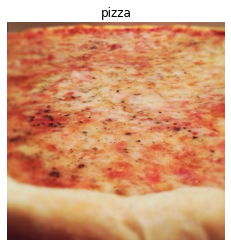

In [27]:
# view random image from the training dataset

img = view_random_image(target_dir=r'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\train/',
                       target_class='pizza')

In [28]:
img

array([[[101,  67,  55],
        [105,  71,  59],
        [110,  77,  62],
        ...,
        [151, 105,  89],
        [152, 106,  91],
        [153, 107,  92]],

       [[ 99,  65,  53],
        [104,  70,  58],
        [110,  77,  62],
        ...,
        [152, 106,  90],
        [152, 106,  90],
        [153, 107,  91]],

       [[ 97,  63,  51],
        [103,  69,  57],
        [110,  77,  62],
        ...,
        [150, 107,  88],
        [150, 107,  88],
        [151, 108,  89]],

       ...,

       [[ 50,  18,  23],
        [ 50,  18,  23],
        [ 50,  18,  23],
        ...,
        [146,  76,  50],
        [147,  77,  51],
        [147,  77,  51]],

       [[ 50,  18,  23],
        [ 50,  18,  23],
        [ 50,  18,  23],
        ...,
        [144,  74,  48],
        [145,  75,  50],
        [145,  75,  50]],

       [[ 50,  18,  23],
        [ 50,  18,  23],
        [ 50,  18,  23],
        ...,
        [143,  73,  48],
        [143,  73,  48],
        [143,  73,  48]]

In [29]:
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[101,  67,  55],
        [105,  71,  59],
        [110,  77,  62],
        ...,
        [151, 105,  89],
        [152, 106,  91],
        [153, 107,  92]],

       [[ 99,  65,  53],
        [104,  70,  58],
        [110,  77,  62],
        ...,
        [152, 106,  90],
        [152, 106,  90],
        [153, 107,  91]],

       [[ 97,  63,  51],
        [103,  69,  57],
        [110,  77,  62],
        ...,
        [150, 107,  88],
        [150, 107,  88],
        [151, 108,  89]],

       ...,

       [[ 50,  18,  23],
        [ 50,  18,  23],
        [ 50,  18,  23],
        ...,
        [146,  76,  50],
        [147,  77,  51],
        [147,  77,  51]],

       [[ 50,  18,  23],
        [ 50,  18,  23],
        [ 50,  18,  23],
        ...,
        [144,  74,  48],
        [145,  75,  50],
        [145,  75,  50]],

       [[ 50,  18,  23],
        [ 50,  18,  23],
        [ 50,  18,  23],
        ...,
        [143,  73,  4

In [30]:
# view the image shape

img.shape   #return width, height, color channels

(512, 512, 3)

In [32]:
# get all the pixel values between 0 and 1

img/255.

array([[[0.39607843, 0.2627451 , 0.21568627],
        [0.41176471, 0.27843137, 0.23137255],
        [0.43137255, 0.30196078, 0.24313725],
        ...,
        [0.59215686, 0.41176471, 0.34901961],
        [0.59607843, 0.41568627, 0.35686275],
        [0.6       , 0.41960784, 0.36078431]],

       [[0.38823529, 0.25490196, 0.20784314],
        [0.40784314, 0.2745098 , 0.22745098],
        [0.43137255, 0.30196078, 0.24313725],
        ...,
        [0.59607843, 0.41568627, 0.35294118],
        [0.59607843, 0.41568627, 0.35294118],
        [0.6       , 0.41960784, 0.35686275]],

       [[0.38039216, 0.24705882, 0.2       ],
        [0.40392157, 0.27058824, 0.22352941],
        [0.43137255, 0.30196078, 0.24313725],
        ...,
        [0.58823529, 0.41960784, 0.34509804],
        [0.58823529, 0.41960784, 0.34509804],
        [0.59215686, 0.42352941, 0.34901961]],

       ...,

       [[0.19607843, 0.07058824, 0.09019608],
        [0.19607843, 0.07058824, 0.09019608],
        [0.19607843, 0

## An end-to-end example


#### lets build CNN to find patterns in our images, more specially we a need way:


##### Load our images
##### preprocess our images
##### build a CNN to find patterns in our images
##### compile our model
##### fit the CNN to our training data

In [34]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
# set random seed
tf.random.set_seed(42)


# Preprocess data (get all of the pixel values between 0 and 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)


# setup paths to our data directories
train_dir = r'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\train/'
test_dir = r'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\test/'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              target_size = (224, 224),
                                              class_mode='binary',
                                              seed=42)


valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode='binary',
                                              seed=42)



# Build a CNN model (same as the tiny VGG on the CNN explainer website)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation='relu',
                          input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3 , activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                             padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



# Compile our CNN model
model_1.compile (loss= 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])


# Fit the model
history_1 = model_1.fit(train_data,
                       epochs=5,
                       steps_per_epoch = len(train_data),
                       validation_data =valid_data,
                       validation_steps= len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 81s 2s/step - loss: 0.5600 - accuracy: 0.7013 - val_loss: 0.3963 - val_accuracy: 0.8400
Epoch 2/5
47/47 [==============================] - 83s 2s/step - loss: 0.4169 - accuracy: 0.8053 - val_loss: 0.3275 - val_accuracy: 0.8740
Epoch 3/5
47/47 [==============================] - 87s 2s/step - loss: 0.4044 - accuracy: 0.8240 - val_loss: 0.3256 - val_accuracy: 0.8740
Epoch 4/5
47/47 [==============================] - 90s 2s/step - loss: 0.3499 - accuracy: 0.8540 - val_loss: 0.3122 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 91s 2s/step - loss: 0.3109 - accuracy: 0.8707 - val_loss: 0.2733 - val_accuracy: 0.8820


In [37]:
# get the model summary


model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [38]:
# learn more about CNN in : https://poloclub.github.io/cnn-explainer/

### use the same model as before


#### lets replicate the model we've built ina previous section to see if it works with our image data. 

##### Tensorflow playground

In [41]:
# set the random seed

tf.random.set_seed(42)


# create the model to replicate the TF playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



# compile the model
model_2.compile(loss= tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics=['accuracy'])


# fit the model
history_2 = model_2.fit(train_data,
                   epochs=5,
                   steps_per_epoch=len(train_data),
                   validation_data=valid_data,
                   validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 28s 593ms/step - loss: 0.6976 - accuracy: 0.4960 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 23s 488ms/step - loss: 0.6932 - accuracy: 0.4760 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 17s 354ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 17s 353ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 17s 357ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [42]:
# get the summary

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# lets try improving our model_2 as its perform badly

In [45]:
# set random seed

tf.random.set_seed(42)


# create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])



# compile the model
model_3.compile(loss= tf.keras.losses.BinaryCrossentropy(),
               optimizer= tf.keras.optimizers.Adam(),
               metrics=['accuracy'])


# fit the model
history_3 = model_3.fit(train_data,
                       epochs=5,
                       steps_per_epoch= len(train_data),
                       validation_data= valid_data,
                       validation_steps= len(valid_data))

Epoch 1/5
47/47 [==============================] - 23s 498ms/step - loss: 2.5642 - accuracy: 0.6260 - val_loss: 0.8432 - val_accuracy: 0.7500
Epoch 2/5
47/47 [==============================] - 21s 455ms/step - loss: 0.7986 - accuracy: 0.7080 - val_loss: 0.4762 - val_accuracy: 0.7620
Epoch 3/5
47/47 [==============================] - 23s 483ms/step - loss: 0.7721 - accuracy: 0.7200 - val_loss: 0.8710 - val_accuracy: 0.6440
Epoch 4/5
47/47 [==============================] - 24s 500ms/step - loss: 0.5779 - accuracy: 0.7513 - val_loss: 0.5788 - val_accuracy: 0.7180
Epoch 5/5
47/47 [==============================] - 22s 459ms/step - loss: 0.7132 - accuracy: 0.7267 - val_loss: 0.9327 - val_accuracy: 0.6320


In [46]:
# get the model 3 summary


model_3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_15 (Dense)             (None, 100)               15052900  
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_17 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification : Lets Break it down

##### 1. become one with the data (visualize)

##### 2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing and turning the data into batches)

##### 3. Create a model (start with a baseline)

##### 4. Fit the model

##### 5. Evaluate the model

##### 6. Adjut different parameters and improve the model (try to beat our baseline)

##### 7. Repeat until satisfied (experiment)

### 1. Become one with the data

Image shape:(512, 382, 3)
Image shape:(384, 512, 3)


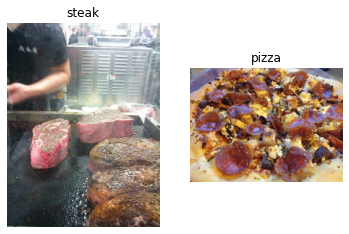

In [47]:
# visualize the data

plt.figure(),
plt.subplot(1,2,1)
steak_img = view_random_image(r'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\train/', 'steak')

plt.subplot(1,2,2)
pizza_img = view_random_image(r'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\train/', 'pizza')

Image shape:(512, 512, 3)
Image shape:(512, 512, 3)


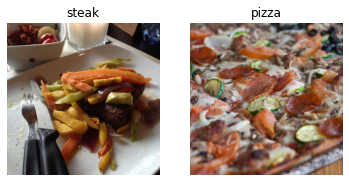

In [48]:
# visualize the data

plt.figure(),
plt.subplot(1,2,1)
steak_img = view_random_image(r'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\train/', 'steak')

plt.subplot(1,2,2)
pizza_img = view_random_image(r'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\train/', 'pizza')

Image shape:(512, 512, 3)
Image shape:(512, 512, 3)


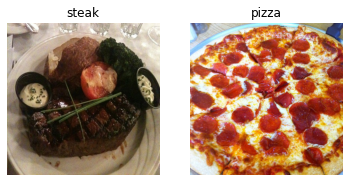

In [49]:
# visualize the data

plt.figure(),
plt.subplot(1,2,1)
steak_img = view_random_image(r'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\train/', 'steak')

plt.subplot(1,2,2)
pizza_img = view_random_image(r'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\train/', 'pizza')

Image shape:(512, 512, 3)
Image shape:(384, 512, 3)


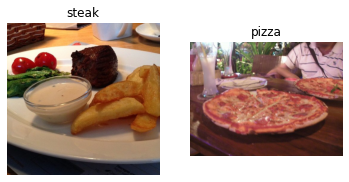

In [50]:
# visualize the data

plt.figure(),
plt.subplot(1,2,1)
steak_img = view_random_image(r'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\train/', 'steak')

plt.subplot(1,2,2)
pizza_img = view_random_image(r'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\train/', 'pizza')

### 2. preprocess the data (prepare if for a model)



In [51]:
# Define directory dataset paths


train_dir = r'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\train/'
test_dir = r'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\test/'




###### our next step is to turn our data into batches

######  a batch is a small subset of data, rather than look at all -10,000 images at one time, a model might only look at 32 at a time.


###### it does this for a couple of reasons:
    ###### 10,0000 images (or more) might not fit into the memory of your processor
    ###### trying to learn the patterns in 10000 images in one hit could result in the model not being able to learn very well
    
    
    
###### Why 32 ? 
    ##### Default batch size .. as per yann lecun

In [54]:
#  !nvidia=smi          # if u use GPU

In [55]:
# Create train and test data generations and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [56]:
# load in our image data from directories and turn them into batches

train_data = train_datagen.flow_from_directory(directory = train_dir,   # target directory of images
                                              target_size= (224,224),   # target size of images(heigh, width)
                                              class_mode='binary',      # type of data you are working with
                                              batch_size=32)            # size of mini batches to load the data into



test_data = test_datagen.flow_from_directory(directory= test_dir,
                                            target_size=(224,224),
                                            class_mode='binary',
                                            batch_size=32)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [57]:
# get a sample of a train data batch

images, labels = train_data.next()   # get the 'next' batch of image/labels in train data
len(images), len(labels)

(32, 32)

In [60]:
# hw many batches are there ?
len(train_data)                # 1500/32


47

In [61]:
# get the first 2 images

images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [62]:
# view the first batch of labels

labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)


#### A baseline is a relatively simple model or existing result that you seetup when beginning a ML experiment and then as you keep experimenting you try to beat the baseline

In [89]:
# make the creating of our model a little easier

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, MaxPool2D, Flatten, Conv2D, MaxPooling2D, Activation
from tensorflow.keras import Sequential



In [66]:
# create the model (this will be our baseline , a layer CNN)



model_4= Sequential([
    Conv2D(filters=10,
          kernel_size=3,
          strides=1,
          padding='valid',
          activation='relu',
          input_shape=(224,224,3)),   # input layer (specify input shape)
    Conv2D(10,3, activation='relu'),
    Conv2D(10,3, activation='relu'),
    Flatten(),
    Dense(1, activation = 'sigmoid')  # output layer (working with binary classification)
])

In [70]:
   # compile the model

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=Adam(),
               metrics=['accuracy'])


# fit the model
history_4 = model_4.fit(train_data,
                       epochs=5,
                       steps_per_epoch= len(train_data),
                       validation_data= test_data,
                       validation_steps= len(test_data))

Epoch 1/5
47/47 [==============================] - 89s 2s/step - loss: 2.2896 - accuracy: 0.6013 - val_loss: 0.5272 - val_accuracy: 0.7360
Epoch 2/5
47/47 [==============================] - 89s 2s/step - loss: 0.4874 - accuracy: 0.7760 - val_loss: 0.4516 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 90s 2s/step - loss: 0.4185 - accuracy: 0.8220 - val_loss: 0.4025 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 90s 2s/step - loss: 0.2914 - accuracy: 0.8987 - val_loss: 0.4248 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 89s 2s/step - loss: 0.1526 - accuracy: 0.9487 - val_loss: 0.4382 - val_accuracy: 0.8080


In [73]:
# evaluate the model

model_4.evaluate(test_data)

16/16 [==============================] - 10s 595ms/step - loss: 0.4382 - accuracy: 0.8080


[0.4382067620754242, 0.8080000281333923]

### 5. Evaluate the model


#### it looks like our model is learning something, lets evaluate it 

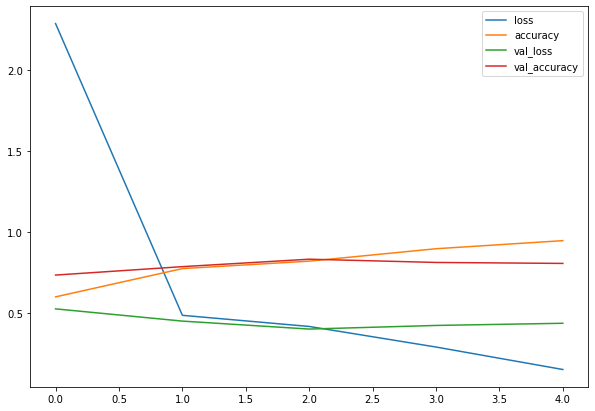

In [75]:
# let plot the training curves

import pandas as pd

pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [77]:
# plot the validation and training curves separately

def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics
    """
    loss=history.history['loss']
    val_loss=history.history['val_loss']
    
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    epochs = range(len(history.history['loss']))   # how many epochs did we run for ?
    
    
    # plot loss
    plt.plot(epochs, loss, label='training loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()
    
    
    
    # plot the accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()

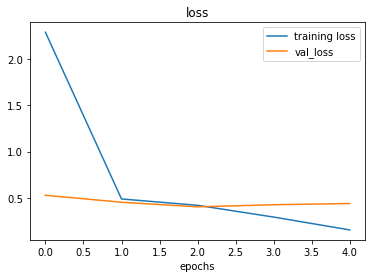

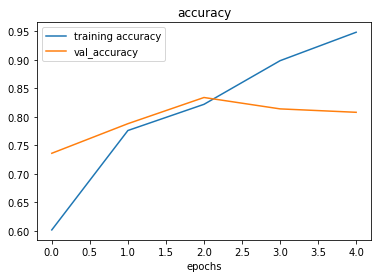

In [78]:
# check out the loss and accuract


plot_loss_curves(history_4)

### 6. Adjust the model parameters  

Fitting a ML model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce Overfitting


Ways to induce overfitting:
1. increase the number of Conv layers
2. Increase the no of conv filters
3. add another dense layer to the output of our flattened layer


Reduce overfitting:
1. add data augmentation
2. add regularization layers (such as maxpool2D)
3. add more data



Note: Reducing overfitting is also know as 'REGULARIZATION'

In [90]:
# create the model  (this is going to be our new baseline)


model_5 = Sequential([
    Conv2D(10,3, activation ='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [91]:
# Compile the model

model_5.compile(loss='binary_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])





In [92]:
# fit the model


history_5 = model_5.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data = test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 47s 998ms/step - loss: 0.6210 - accuracy: 0.6700 - val_loss: 0.4558 - val_accuracy: 0.8220
Epoch 2/5
47/47 [==============================] - 45s 967ms/step - loss: 0.4557 - accuracy: 0.7913 - val_loss: 0.3818 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 47s 996ms/step - loss: 0.4205 - accuracy: 0.8060 - val_loss: 0.3486 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 46s 972ms/step - loss: 0.3826 - accuracy: 0.8387 - val_loss: 0.3302 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 46s 970ms/step - loss: 0.3546 - accuracy: 0.8473 - val_loss: 0.3300 - val_accuracy: 0.8820


In [94]:
model_5.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 6760)             

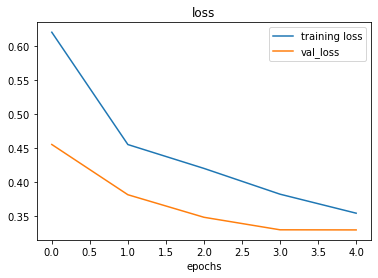

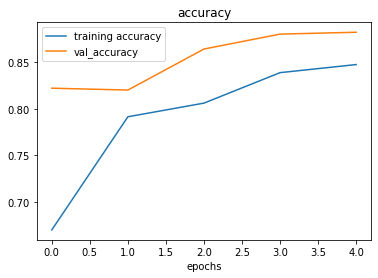

In [95]:
# plot loss curvers

plot_loss_curves(history_5)

### opening our bag of tricks and finding data augmentation




In [98]:
# create ImageDataGenerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.3,
                                            horizontal_flip=True)


# create imagedatagenerator without data augmentation

train_datagen = ImageDataGenerator(rescale=1/255.)


# create imageDataGenerator without data augmentation for the test dataset
test_datagen= ImageDataGenerator(rescale=1/255.)


In [103]:
# import data and augment it from training directory

print('Augmented training data')
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                        target_size=(224,224),
                                        batch_size=32,
                                        class_mode='binary',
                                        shuffle=False)   # for demonsrtation



# Create non-augmented train data batches
print('Non Augmented training data')
train_data= train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='binary',
                                             shuffle=False)

IMG_SIZE = (224,224)

# create non-augmented test data batches
print('Non-Augmented test data')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode='binary',
                                             shuffle=False)

Augmented training data
Found 1500 images belonging to 2 classes.
Non Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented test data
Found 500 images belonging to 2 classes.


In [104]:
# get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() 

showing image : 23


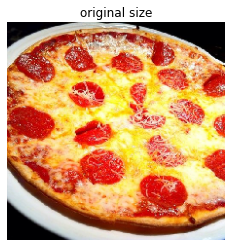

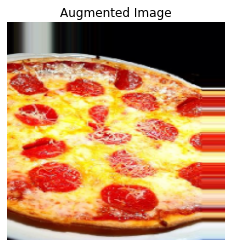

In [105]:
# show original and augmented images

import random
random_number = random.randint(0, 32)
print(f'showing image : {random_number}')
plt.imshow(images[random_number])
plt.title(f'original size')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False);

showing image : 30


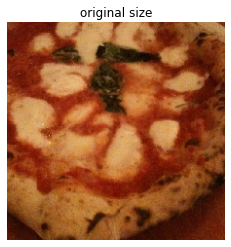

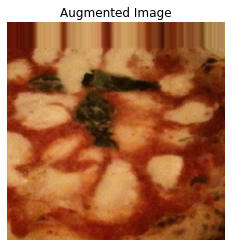

In [106]:
# show original and augmented images

import random
random_number = random.randint(0, 32)
print(f'showing image : {random_number}')
plt.imshow(images[random_number])
plt.title(f'original size')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False);

showing image : 25


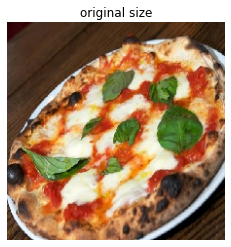

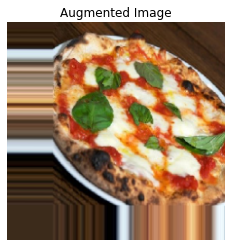

In [107]:
# show original and augmented images

import random
random_number = random.randint(0, 32)
print(f'showing image : {random_number}')
plt.imshow(images[random_number])
plt.title(f'original size')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False);

showing image : 5


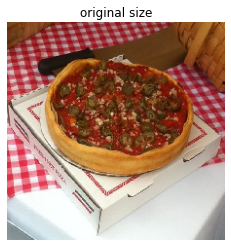

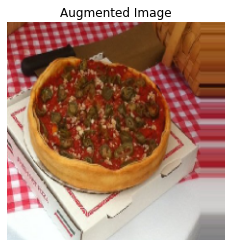

In [108]:
# show original and augmented images

import random
random_number = random.randint(0, 32)
print(f'showing image : {random_number}')
plt.imshow(images[random_number])
plt.title(f'original size')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False);

In [110]:
# Create a model (same as model_5)

model_6 = Sequential([
    Conv2D(10, 3, activation= 'relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])



# compile the model
model_6.compile(loss='binary_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])


# fit the model
history_6 = model_6.fit(train_data_augmented,     # fitting the model 6 on augmented training data
                       epochs=5,
                       steps_per_epoch=len(train_data_augmented),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 61s 1s/step - loss: 0.7052 - accuracy: 0.4860 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 56s 1s/step - loss: 0.6952 - accuracy: 0.5013 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 56s 1s/step - loss: 0.6928 - accuracy: 0.5000 - val_loss: 0.6889 - val_accuracy: 0.5020
Epoch 4/5
47/47 [==============================] - 57s 1s/step - loss: 0.6984 - accuracy: 0.5387 - val_loss: 0.6832 - val_accuracy: 0.5640
Epoch 5/5
47/47 [==============================] - 57s 1s/step - loss: 0.6944 - accuracy: 0.4767 - val_loss: 0.6906 - val_accuracy: 0.5500


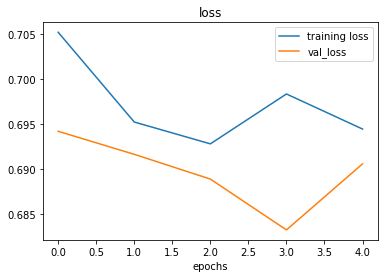

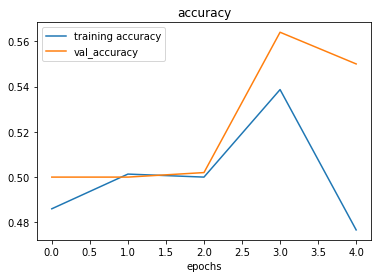

In [111]:
# check out model training curves

plot_loss_curves(history_6)

Lets shuffle our augmented training data and train another model (the same as before) on it and see what happens

In [113]:
# import data and augmented it and shuffle from training directory


train_data_augmented_shuffled= train_datagen_augmented.flow_from_directory(train_dir,
                                                                       target_size=(224,224),
                                                                       class_mode='binary',
                                                                       batch_size=32,
                                                                       shuffle=True)  # shuffle data this time

Found 1500 images belonging to 2 classes.


In [116]:
# create the model same as model 5 and model 6


model_7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3, activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



# compile the model
model_7.compile(loss= 'binary_crossentropy',
               optimizer= tf.keras.optimizers.Adam(),
               metrics=['accuracy'])


# fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                       epochs=5,
                       steps_per_epoch=len(train_data_augmented_shuffled),
                       validation_data= test_data,
                       validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 55s 1s/step - loss: 0.6547 - accuracy: 0.6187 - val_loss: 0.5787 - val_accuracy: 0.7140
Epoch 2/5
47/47 [==============================] - 54s 1s/step - loss: 0.6186 - accuracy: 0.6687 - val_loss: 0.5194 - val_accuracy: 0.7720
Epoch 3/5
47/47 [==============================] - 55s 1s/step - loss: 0.5786 - accuracy: 0.6987 - val_loss: 0.4358 - val_accuracy: 0.8020
Epoch 4/5
47/47 [==============================] - 56s 1s/step - loss: 0.5407 - accuracy: 0.7340 - val_loss: 0.4117 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 56s 1s/step - loss: 0.5220 - accuracy: 0.7533 - val_loss: 0.4170 - val_accuracy: 0.8020


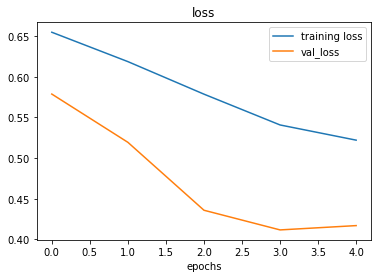

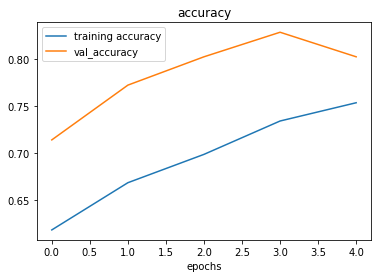

In [117]:
plot_loss_curves(history_7)

### 7. Repeat until satisfied

1. Increase the number of model layers (add more Conv2D, maxpool2d layers)
2. increase the number of filters in each Conv layers (from 10 to 32 or even 64)
3. train for longer (more epochs)
4. find an ideal learning rate
5. Get more data (give the model more opportunity to learn)
6. Use Transfer Learning to levarage what another image model has learn and adjust it for our ow use case

#### Make a prediction with our trained model on our own custom data

In [119]:
# classed we're working with

print(class_names)

['pizza' 'steak']


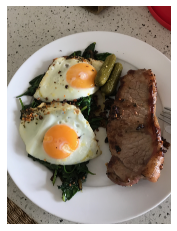

In [123]:
# view our example image

# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
    
    
steak = mpimg.imread(r'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\03-steak.jpeg')
steak
plt.imshow(steak)
plt.axis(False);

In [124]:
# check the shape of our image

steak.shape

(4032, 3024, 3)

In [125]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

In [127]:
expanded_steak = tf.expand_dims(steak, axis=0).shape
expanded_steak

TensorShape([1, 4032, 3024, 3])

When you train a NN and you want to make a prediction with it on your own custom data, its important thatn your custom data (or new data) is preprocessed into the same format as the data your model  was trained on.

In [129]:
# create a function to import and image and resize it to be able to be used with our model


def load_and_prep_image(filename, img_shape=224):
    """
    Reads and image from filename, turns it into a tensor and reshape it
    to (img_shape, img_shape, color_channels)
    """
    
    # read in the image
    img= tf.io.read_file(filename)
    
    # decode the read file into a tenor
    img = tf.image.decode_image(img)
    
    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    
    # rescale the image (get all values between 0 and 1)
    img = img/255.
    
    return img

In [130]:
# load in and preprocess our custom image

steak = load_and_prep_image(r'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\03-steak.jpeg')

steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [134]:
# predict the model on expanded steak

pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.7024258]], dtype=float32)

looks like our custom image is being put through our model, however it currently outputs a predictions visualize the image as well as the model prediction ?


In [135]:
# remind ourselves of class names

class_names

array(['pizza', 'steak'], dtype='<U9')

In [138]:
# we can index the predicted class by rounding the prediction probability and indexing it on the class names

pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [140]:
def pred_and_plot(model, filename, class_names=class_names):
    """
    imports an image located at filename, maks a prediction with model
    and plots th image with the predicted class as the title
    """
    
    # import the target image and preprocess it
    img= load_and_prep_image(filename)
    
    # make a prediction
    pred= model.predict(tf.expand_dims(img, axis=0))
    
    # get the predicted class
    pred_class= class_names[int(tf.round(pred))]
    
    # plt the image
    plt.imshow(img)
    plt.title(f" Prediction : {pred_class}")
    plt.axis(False);

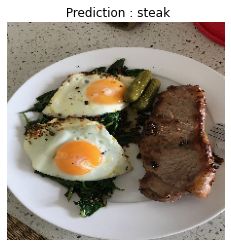

In [141]:
# Test our model on a custom image

pred_and_plot(model_7, r'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\03-steak.jpeg' )

Our model works ! lets try it on another image.. this time PIZZA

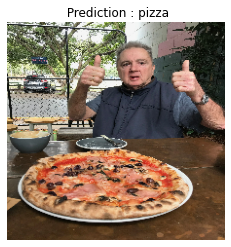

In [145]:
# download another test custom image and make prediction on it

pred_and_plot(model_7, r'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\03-pizza.jpeg' )

# MULTI-CLASS IMAGE CLASSIFICATION

## Multi-class image classification

##### we/ve just been through a bunch of the following steps with binary classification problem (pizza/steak) . now we are going to step things up a notch with 10 classes of food (multi-class classifcation)

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with the baseline)
4. Fit the model (oerfit it to make sure it works)
5. evaluate the model
6. adjust different hyperparameters and improve the model (tru to beat baseline/reduce overfitting)
7. Repeat until satisified

### 1. Import and become one with the data

In [147]:
import zipfile

# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
    
    
# unzip our data

zip_ref = zipfile.ZipFile(r"D:\Data Science Course details\Udemy_dataset\10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()


In [151]:
# walk through 10 classes of food image data



import os
entries = os.listdir(r"D:\Data Science Course details\Udemy_dataset\10_food_classes_all_data\10_food_classes_all_data")
entries

['test', 'train']

In [159]:
# walk through pizza_steak directory and list no of files

for dirpath, dirnames, filenames in os.walk(r'D:\Data Science Course details\Udemy_dataset\10_food_classes_all_data\10_food_classes_all_data'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'D:\Data Science Course details\Udemy_dataset\10_food_classes_all_data\10_food_classes_all_data'.
There are 10 directories and 0 images in 'D:\Data Science Course details\Udemy_dataset\10_food_classes_all_data\10_food_classes_all_data\test'.
There are 0 directories and 250 images in 'D:\Data Science Course details\Udemy_dataset\10_food_classes_all_data\10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in 'D:\Data Science Course details\Udemy_dataset\10_food_classes_all_data\10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in 'D:\Data Science Course details\Udemy_dataset\10_food_classes_all_data\10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in 'D:\Data Science Course details\Udemy_dataset\10_food_classes_all_data\10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in 'D:\Data Science Course details\Udemy_data

In [195]:
# setup the train and test directories

train_dir ='D:/Data Science Course details/Udemy_dataset/10_food_classes_all_data/10_food_classes_all_data/train/'


In [196]:
test_dir = 'D:/Data Science Course details/Udemy_dataset/10_food_classes_all_data/10_food_classes_all_data/test/'

In [197]:
# visualize the data

# lets get the class names

import random
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [198]:
random.choice(class_names)

'chicken_wings'

Image shape:(512, 512, 3)


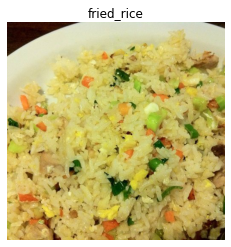

In [199]:
import random
img = view_random_image(target_dir= train_dir,
                       target_class= random.choice(class_names))

Image shape:(512, 384, 3)


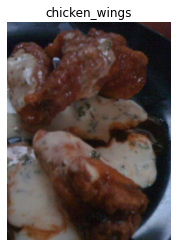

In [200]:
import random
img = view_random_image(target_dir= train_dir,
                       target_class= random.choice(class_names))

Image shape:(306, 512, 3)


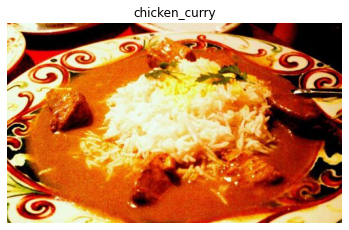

In [201]:
import random
img = view_random_image(target_dir= train_dir,
                       target_class= random.choice(class_names))

Image shape:(512, 512, 3)


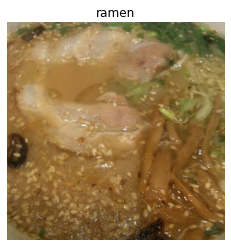

In [202]:
import random
img = view_random_image(target_dir= train_dir,
                       target_class= random.choice(class_names))

Image shape:(384, 512, 3)


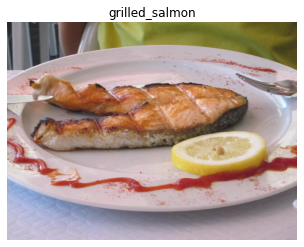

In [203]:
import random
img = view_random_image(target_dir= train_dir,
                       target_class= random.choice(class_names))

In [188]:
random.choice(class_names)

'ramen'

### 2. Preprocess the data (prepare it for the model)

In [204]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# rescale
train_datagen = ImageDataGenerator(rescale = 1/255.)

test_datagen = ImageDataGenerator(rescale= 1/255.)


# load data in from directories and turning into batches

train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size = 32,
                                              class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size=(224,224),
                                              batch_size = 32,
                                              class_mode = 'categorical')


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)


In [206]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

In [210]:
# create our model 

model_8 = Sequential([
    Conv2D(10,3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Conv2D(10,3, activation='relu'),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
    
])


# Compile the model

model_8.compile(loss='categorical_crossentropy',
               optimizer= tf.keras.optimizers.Adam(),
               metrics=['accuracy'])



# fit the model

history_8 = model_8.fit(train_data,             # now we 10 different classes
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data= test_data,
                       validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 472s 2s/step - loss: 2.2461 - accuracy: 0.1423 - val_loss: 2.0820 - val_accuracy: 0.2328
Epoch 2/5
235/235 [==============================] - 468s 2s/step - loss: 1.9328 - accuracy: 0.3268 - val_loss: 1.8903 - val_accuracy: 0.3356
Epoch 3/5
235/235 [==============================] - 40648s 173s/step - loss: 1.5891 - accuracy: 0.4568 - val_loss: 1.9540 - val_accuracy: 0.3236
Epoch 4/5
235/235 [==============================] - 407s 2s/step - loss: 1.0728 - accuracy: 0.6425 - val_loss: 2.4593 - val_accuracy: 0.3040
Epoch 5/5
235/235 [==============================] - 395s 2s/step - loss: 0.5001 - accuracy: 0.8396 - val_loss: 3.3554 - val_accuracy: 0.2816


### 5. Evaluate the model




In [211]:
# evaluate the model

model_8.evaluate(test_data)


79/79 [==============================] - 58s 737ms/step - loss: 3.3554 - accuracy: 0.2816


[3.3553597927093506, 0.2815999984741211]

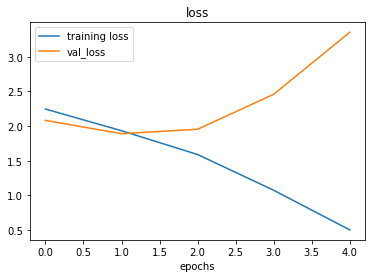

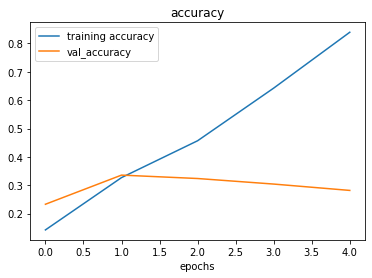

In [212]:
# check out the model's loss curves on the 10 class

plot_loss_curves(history_8)

As per the plot,  our model is 'OVERFITTING'

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

In [214]:
# how about we try and simplify the model

# lets remove 2 Conv layers


# create our model 

model_9 = Sequential([
    Conv2D(10,3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
    
])


# Compile the model

model_9.compile(loss='categorical_crossentropy',
               optimizer= tf.keras.optimizers.Adam(),
               metrics=['accuracy'])



# fit the model

history_9 = model_9.fit(train_data,             # now we 10 different classes
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data= test_data,
                       validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 354s 2s/step - loss: 2.5373 - accuracy: 0.2291 - val_loss: 1.9603 - val_accuracy: 0.3020
Epoch 2/5
235/235 [==============================] - 364s 2s/step - loss: 1.7773 - accuracy: 0.3932 - val_loss: 1.9714 - val_accuracy: 0.3100
Epoch 3/5
235/235 [==============================] - 361s 2s/step - loss: 1.1818 - accuracy: 0.6217 - val_loss: 2.2227 - val_accuracy: 0.2852
Epoch 4/5
235/235 [==============================] - 354s 2s/step - loss: 0.3897 - accuracy: 0.8981 - val_loss: 2.7233 - val_accuracy: 0.2784
Epoch 5/5
235/235 [==============================] - 349s 1s/step - loss: 0.1003 - accuracy: 0.9805 - val_loss: 3.4711 - val_accuracy: 0.2748


In [215]:
model_9.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
activation_4 (Activation)    (None, 222, 222, 10)      0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 121000)            0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                1210010   
Total params: 1,211,200
Trainable params: 1,211,200
Non-trainable params: 0
___________________________________________

In [216]:
# evaluate the model

model_9.evaluate(test_data)


79/79 [==============================] - 45s 564ms/step - loss: 3.4711 - accuracy: 0.2748


[3.4710886478424072, 0.27480000257492065]

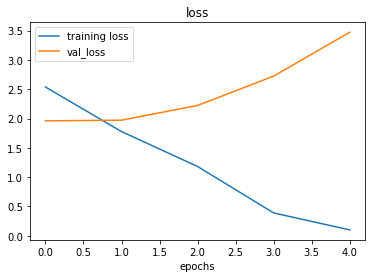

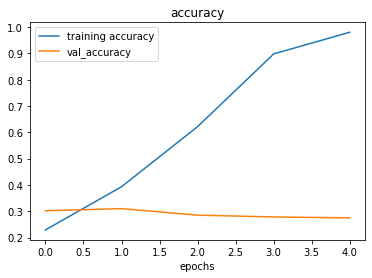

In [217]:
# check out the model's loss curves on the 10 class

plot_loss_curves(history_9)

#### Trying to reduce overfitting with data augmentation



In [218]:
# create an augmented data generator instance

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2,
                                            zoom_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.3,
                                            horizontal_flip=True)



train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')




Found 7500 images belonging to 10 classes.


In [219]:
# lets create another model but this time we'll fit it on the augmented train


model_10 = tf.keras.models.clone_model(model_8)


# compile the model
# Compile the model

model_10.compile(loss='categorical_crossentropy',
               optimizer= tf.keras.optimizers.Adam(),
               metrics=['accuracy'])



# fit the model

history_10 = model_10.fit(train_data_augmented,            
                       epochs=5,
                       steps_per_epoch=len(train_data_augmented),
                       validation_data= test_data,
                       validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 374s 2s/step - loss: 2.4211 - accuracy: 0.1637 - val_loss: 2.1287 - val_accuracy: 0.2240
Epoch 2/5
235/235 [==============================] - 322s 1s/step - loss: 2.1628 - accuracy: 0.2205 - val_loss: 2.0785 - val_accuracy: 0.2444
Epoch 3/5
235/235 [==============================] - 318s 1s/step - loss: 2.1107 - accuracy: 0.2397 - val_loss: 1.9940 - val_accuracy: 0.3024
Epoch 4/5
235/235 [==============================] - 317s 1s/step - loss: 2.0823 - accuracy: 0.2621 - val_loss: 1.9860 - val_accuracy: 0.2908
Epoch 5/5
235/235 [==============================] - 339s 1s/step - loss: 2.0686 - accuracy: 0.2707 - val_loss: 1.9171 - val_accuracy: 0.3380


In [220]:
model_10.evaluate(test_data)


79/79 [==============================] - 36s 450ms/step - loss: 1.9171 - accuracy: 0.3380


[1.917077898979187, 0.33799999952316284]

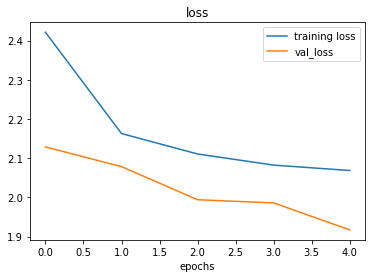

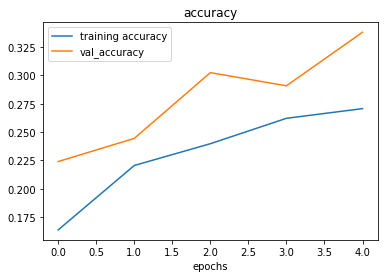

In [221]:
# check out the model's loss curves on the 10 class

plot_loss_curves(history_10)

### 7. Repeat until satisfied


we could going here... continally trying to bring our loss curves closer together and trying to...

1. Restructuring our models architecture (increasing layers/hidden units)
2. adjust the learning rate
3. try different methods of data augmentation (adjust hyperparameters in our imagedatagenerator)
4. training for longer (eg: 10 epochs instead of 5 epochs)
5. try Transfer learning


### Making a prediction with our trained model



let use our trained model to make some predictions on our custom images



In [223]:
# reconfig pred and plot function to work with multi class images



def pred_and_plot(model, filename, class_names=class_names):
    """
    imports an image located at filename, maks a prediction with model
    and plots th image with the predicted class as the title
    """
    
    # import the target image and preprocess it
    img= load_and_prep_image(filename)
    
    # make a prediction
    pred= model.predict(tf.expand_dims(img, axis=0))
    
    # add in logic for multi-class
    if len(pred[0]) >1 :
        pred_class = class_names[tf.argmax(pred[0])]
        
    else:
        pred_class= class_names[int(tf.round(pred[0]))]
    
    
    
    # plt the image
    plt.imshow(img)
    plt.title(f" Prediction : {pred_class}")
    plt.axis(False);

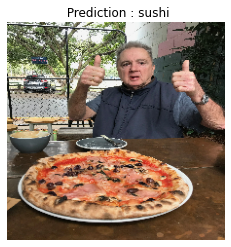

In [225]:
pred_and_plot(model=model_10,
             filename= r'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\03-pizza.jpeg',
             class_names=class_names)

Looks like our model didn't perform very well on our custom images but this because it only acheived 39% accuracy on the test data.

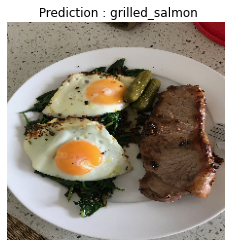

In [226]:
pred_and_plot(model=model_10,
             filename= r'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\03-steak.jpeg',
             class_names=class_names)

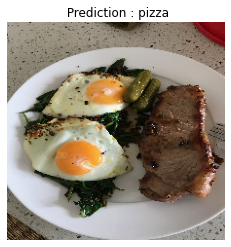

In [230]:
pred_and_plot(model=model_3,
             filename= r'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\03-steak.jpeg',
             class_names=['pizza', 'strak'])

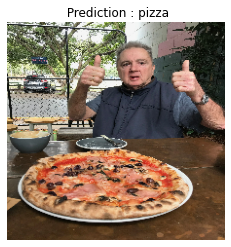

In [229]:
pred_and_plot(model=model_3,
             filename= r'D:\Data Science Course details\Udemy_dataset\pizza_steak\pizza_steak\03-pizza.jpeg',
             class_names=['pizza', 'strak'])

## Saving and Loading our model



In [231]:
# save a model

model_10.save(r'D:\Data Science Course details\Udemy_dataset\saved_trained_model_10')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: D:\Data Science Course details\Udemy_dataset\saved_trained_model_10\assets


In [232]:
# load in a trained model and evaluate it

loaded_model_10 = tf.keras.models.load_model(r'D:\Data Science Course details\Udemy_dataset\saved_trained_model_10')

loaded_model_10.evaluate(test_data)

79/79 [==============================] - 43s 540ms/step - loss: 1.9171 - accuracy: 0.3380


[1.9170777797698975, 0.33799999952316284]

In [233]:
# compare our loaded model to our existing model

model_10.evaluate(test_data)

79/79 [==============================] - 44s 559ms/step - loss: 1.9171 - accuracy: 0.3380


[1.9170784950256348, 0.33799999952316284]